In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.8 MB/s eta 0:00:00


In [2]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.0 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np

# Transformada cuántica de Fourier

## Ejemplo de codificación del estado $|110\rangle$.

In [ ]:
# Crear un circuito cuántico con 3 qubits y 3 bits clásicos
qc = QuantumCircuit(3, 3)

# Estado inicial |110⟩
qc.x(1)
qc.x(2)
qc.barrier()
##### 1 ####
# Aplicar Hadamard al primer qubit
qc.h(0)
# Aplicar R2 al segundo qubit controlado por el primer qubit
qc.cp(2 * np.pi / 2**2, 0, 1)
# Aplicar R3 al tercer qubit controlado por el primer qubit
qc.cp(2 * np.pi / 2**3, 0, 2)
qc.barrier()

##### 2 ####
# Aplicar Hadamard al segundo qubit
qc.h(1)
# Aplicar R2 al tercer qubit controlado por el segundo qubit
qc.cp(2 * np.pi / 2**2, 1, 2)
qc.barrier()

##### 3 ####
# Aplicar Hadamard al tercer qubit
qc.h(2)
qc.barrier()

# Invertir el orden de los qubits
qc.swap(0, 2)
qc.barrier()

# Visualizar el circuito
qc.draw()

░ ┌───┐                   ░                ░       ░     ░ 
q_0: ──────░─┤ H ├─■────────■────────░────────────────░───────░──X──░─
     ┌───┐ ░ └───┘ │P(π/2)  │        ░ ┌───┐          ░       ░  │  ░ 
q_1: ┤ X ├─░───────■────────┼────────░─┤ H ├─■────────░───────░──┼──░─
     ├───┤ ░                │P(π/4)  ░ └───┘ │P(π/2)  ░ ┌───┐ ░  │  ░ 
q_2: ┤ X ├─░────────────────■────────░───────■────────░─┤ H ├─░──X──░─
     └───┘ ░                         ░                ░ └───┘ ░     ░ 
c: 3/═════════════════════════════════════════════════════════════════

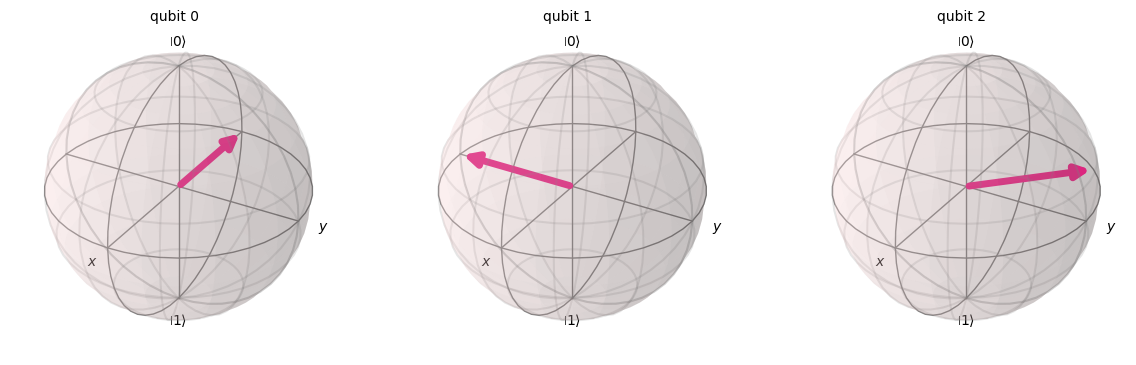

In [ ]:
# Ejecutar el circuito en el simulador AerSimulator sin mediciones
final_state = Statevector.from_instruction(qc)

# Visualizar el estado final en la esfera de Bloch para cada qubit
plot_bloch_multivector(final_state)

## Ejemplo de codificación del estado $|1111\rangle$.

In [ ]:
# Crear un circuito cuántico con 4 qubits para QFT
qc = QuantumCircuit(4)

# Estado inicial |1111⟩
qc.x(0)
qc.x(1)
#qc.x(2)
qc.x(3)


# Aplicar Hadamard al primer qubit
qc.h(0)

# Aplicar R2 al segundo qubit controlado por el primer qubit
qc.cp(2 * np.pi / 2**2, 0, 1)

# Aplicar R3 al tercer qubit controlado por el primer qubit
qc.cp(2 * np.pi / 2**3, 0, 2)

# Aplicar R4 al cuarto qubit controlado por el primer qubit
qc.cp(2 * np.pi / 2**4, 0, 3)
qc.barrier()

# Aplicar Hadamard al segundo qubit
qc.h(1)

# Aplicar R2 al tercer qubit controlado por el segundo qubit
qc.cp(2 * np.pi / 2**2, 1, 2)

# Aplicar R3 al cuarto qubit controlado por el segundo qubit
qc.cp(2 * np.pi / 2**3, 1, 3)
qc.barrier()

# Aplicar Hadamard al tercer qubit
qc.h(2)

# Aplicar R2 al cuarto qubit controlado por el tercer qubit
qc.cp(2 * np.pi / 2**2, 2, 3)
qc.barrier()

# Aplicar Hadamard al cuarto qubit
qc.h(3)
qc.barrier()

# Invertir el orden de los qubits
qc.swap(0, 3)
qc.swap(1, 2)

# Visualizar el circuito
qc.draw()

┌───┐┌───┐                            ░                         ░      »
q_0: ┤ X ├┤ H ├─■────────■────────■────────░─────────────────────────░──────»
     ├───┤└───┘ │P(π/2)  │        │        ░ ┌───┐                   ░      »
q_1: ┤ X ├──────■────────┼────────┼────────░─┤ H ├─■────────■────────░──────»
     └───┘               │P(π/4)  │        ░ └───┘ │P(π/2)  │        ░ ┌───┐»
q_2: ────────────────────■────────┼────────░───────■────────┼────────░─┤ H ├»
     ┌───┐                        │P(π/8)  ░                │P(π/4)  ░ └───┘»
q_3: ┤ X ├────────────────────────■────────░────────────────■────────░──────»
     └───┘                                 ░                         ░      »
«               ░       ░       
«q_0: ──────────░───────░──X────
«               ░       ░  │    
«q_1: ──────────░───────░──┼──X─
«               ░       ░  │  │ 
«q_2: ─■────────░───────░──┼──X─
«      │P(π/2)  ░ ┌───┐ ░  │    
«q_3: ─■────────░─┤ H ├─░──X────
«               ░ └───┘ ░

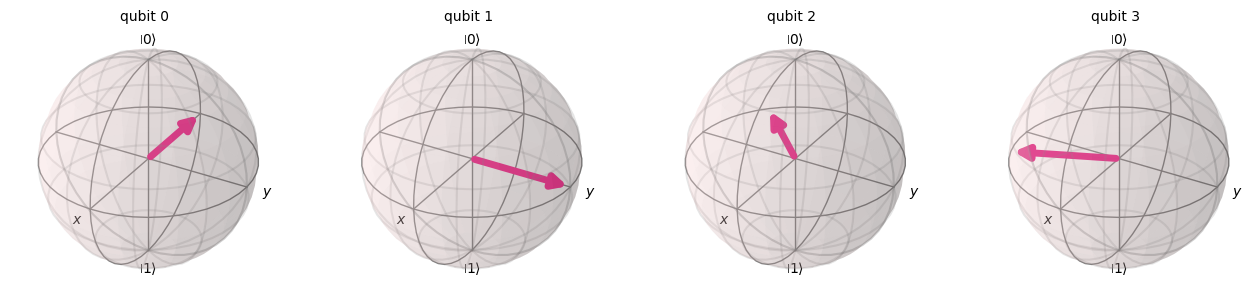

In [ ]:
# Ejecutar el circuito en el simulador AerSimulator sin mediciones
final_state = Statevector.from_instruction(qc)

# Visualizar el estado final en la esfera de Bloch para cada qubit
plot_bloch_multivector(final_state)

## Suma $3 + 5$ usando QFT

In [ ]:
def qft(circuit, n):
    """Aplica la QFT a los primeros n qubits de circuit."""
    for j in range(n):
        for k in range(j):
            circuit.cp(np.pi/(2**(j-k)), k, j)
        circuit.h(j)
    circuit.barrier()
    return circuit

def qft_dagger(circuit, n):
    """Aplica la QFT inversa a los primeros n qubits de circuit."""
    for j in range(n-1, -1, -1):
        circuit.h(j)
        for k in range(j-1, -1, -1):
            circuit.cp(-np.pi/(2**(j-k)), k, j)
    circuit.barrier()
    return circuit

In [ ]:
# Crear circuito cuantico
qa = QuantumRegister(4,name='a')
qb = QuantumRegister(4,name='b')
cr = ClassicalRegister(4,name='c')
qc = QuantumCircuit(qa,qb,cr,name='qc')

# Representar los números 3 (011) y 5 (101)
qc.x([2, 3])  # Número 3 (0011)
qc.x([5, 7])  # Número 5 (0101)

# Aplicar la QFT a los primeros 3 qubits
qft(qc, len(qa))

# Sumar las fases en el dominio de la frecuencia
"""qc.cp( np.pi, qb[0], qa[0])
qc.cp( np.pi/2, qb[1], qa[0] )
qc.cp( np.pi/4, qb[2], qa[0] )
qc.cp( np.pi/8, qb[3], qa[0] )
qc.cp( np.pi, qb[1], qa[1])
qc.cp( np.pi/2, qb[2], qa[1] )
qc.cp( np.pi/4, qb[3], qa[1] )
qc.cp( np.pi, qb[2], qa[2] )
qc.cp( np.pi/2, qb[3], qa[2] )
qc.cp( np.pi, qb[3], qa[3] )"""
contador = 0
for i in range(len(qa)):
    for j in range(len(qb)):
      if (j+contador) < 4:
        qc.cp(np.pi / 2**j, qb[j+contador], qa[i])
      else:
        continue
    contador += 1
qc.barrier()

# Aplicar la QFT inversa
qft_dagger(qc, len(qa))

# Medir el resultado
qc.measure([0,1,2,3], [0,1,2,3])

# Visualizar el circuito
print(qc.draw())

     ┌───┐                                                                     »
a_0: ┤ H ├─■─────────────■─────────────────■───────────────────────────────────»
     └───┘ │P(π/2) ┌───┐ │                 │                                   »
a_1: ──────■───────┤ H ├─┼────────■────────┼─────────────■─────────────────────»
     ┌───┐         └───┘ │P(π/4)  │P(π/2)  │       ┌───┐ │                     »
a_2: ┤ X ├───────────────■────────■────────┼───────┤ H ├─┼────────■────────────»
     ├───┤                                 │P(π/8) └───┘ │P(π/4)  │P(π/2) ┌───┐»
a_3: ┤ X ├─────────────────────────────────■─────────────■────────■───────┤ H ├»
     └───┘                                                                └───┘»
b_0: ──────────────────────────────────────────────────────────────────────────»
     ┌───┐                                                                     »
b_1: ┤ X ├─────────────────────────────────────────────────────────────────────»
     └───┘                  

Resultados de la suma usando QFT: {'0001': 1024}


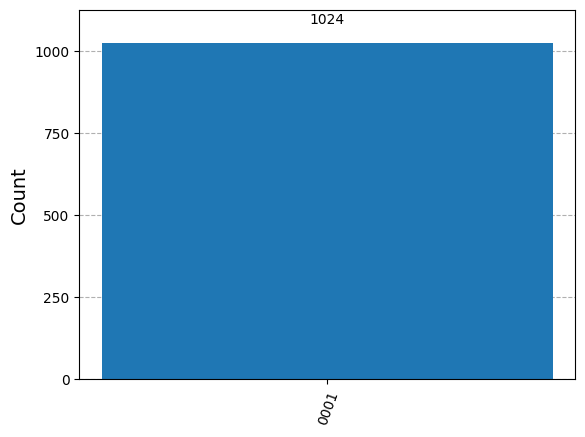

In [ ]:
# Ejecutar el circuito en el simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(compiled_circuit)

# Mostrar los resultados
print("Resultados de la suma usando QFT:", counts)
plot_histogram(counts)

# Estimación de Fase

## Estimacion de fase para un autoevaluador de 3 qubits

In [5]:
def qft_dagger(circuit, n):
    """Aplica la QFT inversa a los primeros n qubits de circuit."""
    for j in range(n-1, -1, -1):
        for k in range(j-1, -1, -1):
            circuit.cp(-np.pi / 2**(j-k), k, j)
        circuit.h(j)
    circuit.barrier()
    return circuit

In [ ]:
# Crear un circuito cuántico
n = 3  # Número de qubits en el registro de control
qc = QuantumCircuit(n + 1, n)

# Estado inicial: |psi>
qc.x(n)  # Aplicar X al último qubit para crear |1>

# Aplicar H^{\otimes n} al registro de control
qc.h(range(n))
qc.barrier()

# Aplicar U^{2^j} de manera controlada
for qubit in range(n):
    qc.cp(np.pi / 2**(n - qubit - 1), qubit, n)
qc.barrier()

# Aplicar la QFT inversa
qft_dagger(qc, n)
qc.barrier()

# Medir el registro de control
qc.measure(range(n), range(n))

# Visualizar el circuito
print(qc.draw())

     ┌───┐ ░                           ░                               ┌───┐ ░ »
q_0: ┤ H ├─░──■────────────────────────░────────────■─────────■────────┤ H ├─░─»
     ├───┤ ░  │                        ░            │         │P(-π/2) ├───┤ ░ »
q_1: ┤ H ├─░──┼────────■───────────────░──■─────────┼─────────■────────┤ H ├─░─»
     ├───┤ ░  │        │               ░  │P(-π/2)  │P(-π/4)   ┌───┐   └───┘ ░ »
q_2: ┤ H ├─░──┼────────┼────────■──────░──■─────────■──────────┤ H ├─────────░─»
     ├───┤ ░  │P(π/4)  │P(π/2)  │P(π)  ░                       └───┘         ░ »
q_3: ┤ X ├─░──■────────■────────■──────░─────────────────────────────────────░─»
     └───┘ ░                           ░                                     ░ »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ░ ┌─┐      
«q_0: ─░─┤M├──────
«      ░ └╥┘┌─┐   
«q_1: ─░──╫─┤M├───
«      ░  ║ └╥┘┌─┐
«q_2: ─░──╫──╫

Resultados de la estimación de fase: {'101': 14, '001': 69, '111': 65, '011': 57, '010': 57, '000': 213, '100': 482, '110': 67}
Estimaciones de fase: {'101': 0.625, '001': 0.125, '111': 0.875, '011': 0.375, '010': 0.25, '000': 0.0, '100': 0.5, '110': 0.75}


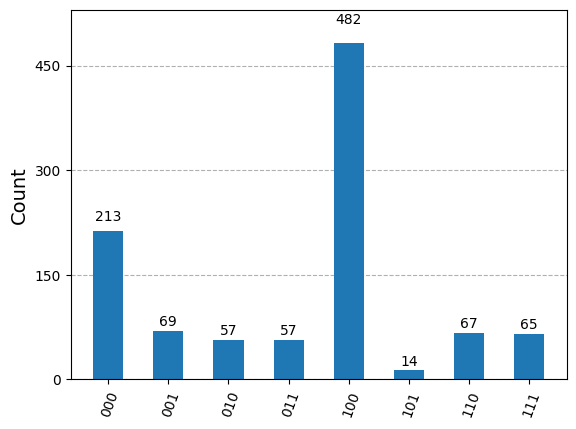

In [ ]:
# Ejecutar el circuito en el simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Obtener y mostrar los resultados
counts = result.get_counts(compiled_circuit)
print("Resultados de la estimación de fase:", counts)
plot_histogram(counts)

# Convertir los resultados de las mediciones a una estimación de la fase
phi_estimates = {state: int(state, 2) / 2**n for state in counts}
print("Estimaciones de fase:", phi_estimates)
plot_histogram(counts)

## Ejemplo de estimación de fase para un Hamiltoniano

### El operador aplicado es $U = e^{-i \frac{\pi}{5} Z}$

In [23]:
# Crear un circuito cuántico
n = 4  # Número de qubits en el registro de control
qc = QuantumCircuit(n + 1, n)

# Estado inicial del qubit de trabajo: |+>
qc.h(n)  # Aplicar H al último qubit para crear |+>

# Aplicar H^{\otimes n} al registro de control
qc.h(range(n))

# Aplicar el operador U = e^{-i \pi Z / 5} controlado
#qc.rz(np.pi / 5, n)
for qubit in range(n):
    qc.cp((np.pi/5) / 2**(n - qubit - 1), qubit, n)

# Aplicar la QFT inversa
qft_dagger(qc, n)

# Medir el registro de control
qc.measure(range(n), range(n))

# Visualizar el circuito
print(qc.draw())

     ┌───┐                                                                     »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────■────────»
     ├───┤ │                                                          │        »
q_1: ┤ H ├─┼─────────■──────────────────────────────────────■─────────┼────────»
     ├───┤ │         │                                      │         │        »
q_2: ┤ H ├─┼─────────┼─────────■──────────────────■─────────┼─────────┼────────»
     ├───┤ │         │         │                  │P(-π/2)  │P(-π/4)  │P(-π/8) »
q_3: ┤ H ├─┼─────────┼─────────┼─────────■────────■─────────■─────────■────────»
     ├───┤ │P(π/40)  │P(π/20)  │P(π/10)  │P(π/5)                               »
q_4: ┤ H ├─■─────────■─────────■─────────■─────────────────────────────────────»
     └───┘                                                                     »
c: 4/══════════════════════════════════════════════════════════════════════════»
                            

Resultados de la estimación de fase: {'1010': 27, '0011': 4, '0111': 113, '1011': 48, '0000': 228, '0010': 111, '1100': 5, '1000': 21, '0110': 81, '1101': 31, '1001': 8, '0101': 34, '1110': 65, '1111': 139, '0001': 44, '0100': 65}
Estimaciones de fase: {'1010': 0.625, '0011': 0.1875, '0111': 0.4375, '1011': 0.6875, '0000': 0.0, '0010': 0.125, '1100': 0.75, '1000': 0.5, '0110': 0.375, '1101': 0.8125, '1001': 0.5625, '0101': 0.3125, '1110': 0.875, '1111': 0.9375, '0001': 0.0625, '0100': 0.25}


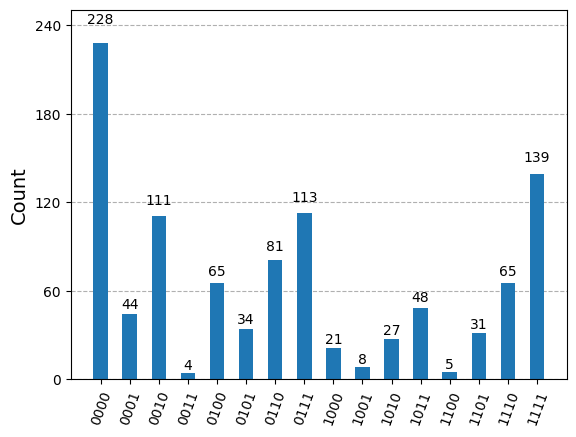

In [24]:
# Ejecutar el circuito en el simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Obtener y mostrar los resultados
counts = result.get_counts(compiled_circuit)
print("Resultados de la estimación de fase:", counts)

# Convertir los resultados de las mediciones a una estimación de la fase
phi_estimates = {state: int(state, 2) / 2**n for state in counts}
print("Estimaciones de fase:", phi_estimates)
plot_histogram(counts)